<a href="https://colab.research.google.com/github/KezhenLi/Homework3/blob/main/homework3.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import ones,copy,cos,sin,tan,pi,linspace,sqrt
from pylab import plot, show, xlabel, ylabel,title

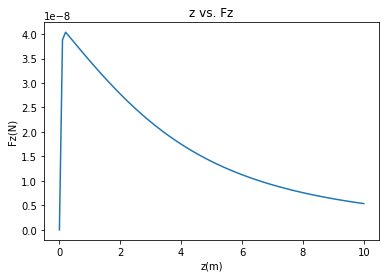

In [23]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

G = 6.674 * 10 ** -11 
sigma = 100  #10^4 kg/ 100 m^2
N = 100  
r, w = gaussxwab(N, -5, 5)

def Fz(z):
    integral = 0
    for i in range(N):
        for j in range(N):
            integral += G * sigma * w[i] * w[j] * z / (r[i] ** 2 + r[j] ** 2 + z ** 2) ** (3/2)
    return integral

z = linspace(0, 10, 100)
plot(z, Fz(z))
xlabel("z(m)")
ylabel("Fz(N)")
title("z vs. Fz")
show()



#(a): F = G m1 m2/(r^2), m1 = 1kg, m2 = dx dy dz sigma, r = (x^2+y^2+z^2)^(1/2),
#.    dF = G dx dy dz sigma/(x^2+y^2+z^2), z component dFz = G dx dy dz sigma/(x^2+y^2+z^2)^(3/2)
#.    Fz = G dx dy z sigma intergral(L/2,-L/2)(L/2,-L/2)(dx dy /(x^2+y^2+z^2)^(3/2))
#(c): Because we don't have enough points near z=0, one way to remove it is plot from z = 0.5 to z = 10
